## Boston 주택 가격 예측 모델
### 데이터셋의 feature에 대한 설명
* feature       설명
###### CRIM	    자치시별 1인당 범죄율
###### ZN	    25,000 평방피트를 초과하는 거주지역의 비율
###### INDUS	비소매상업지역이 점유하고 있는 토지의 비율
###### CHAS	    찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
###### NOX	    10ppm 당 농축 일산화질소
###### RM	    주택 1 가구당 평균 방의 개수
###### AGE	    1940년 이전에 건축된 소유주택의 비율
###### DIS	    5개의 보스턴 직업센터까지의 접근성 지수
###### RAD	    방사형 도로까지의 접근성 지수
###### TAX	    10,000 달러당 재산세율
###### PTRATIO  자치시(town)별 학생/교사 비율
###### B	    1000(Bk−0.63)^2, 여기서Bk는 자치시별 흑인의 비율을 말함
###### LSTAT	모집단의 하위계층의 비율(%)
###### MEDV	    본인 소유의 주택가격(중앙값)(단위: $1,000)

### 데이터 로드 및 전처리
* keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

65536/57026 [==================================] - 0s 0us/step
404
102


* 데이터셋의 전처리를 위해 표준화 작업을 수행 

In [2]:
# 데이터셋의 전처리를 위해 표준화 작업을 수행
# 먼저 입력 데이터의 각 특성의 평균을 빼기
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나누기
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만들기
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나누기
test_data -= mean
test_data /= std

In [3]:
# train 데이터셋을 train과 validation으로 나누기
from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = (train_test_split(train_data, train_labels, test_size=0.2))

### 모델 구성 및 컴파일
* 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일
* Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성

In [4]:
# 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일
# input_shape은 (train_data.shape[1], )으로 구성
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))    # 활성화함수가 존재x
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### 모델 학습
* epochs와 batch size는 자유롭게 설정 (80, 16)
* 모델 학습 후에는 모델 학습 결과를 시각화

In [5]:
# 예측을 위한 딥러닝 모델을 학습
model = build_model()
model.fit(train_data, train_labels,
          epochs=80, batch_size=16)
history = model.fit(train_data, train_labels, epochs=80, batch_size = 16, validation_data=(val_data, val_labels))

Epoch 1/80
21/21 [==============================] - 1s 3ms/step - loss: 575.2090 - mae: 22.0275
Epoch 2/80
21/21 [==============================] - 0s 2ms/step - loss: 552.5131 - mae: 21.5017
Epoch 3/80
21/21 [==============================] - 0s 2ms/step - loss: 530.1890 - mae: 20.9602
Epoch 4/80
21/21 [==============================] - 0s 2ms/step - loss: 505.8544 - mae: 20.3485
Epoch 5/80
21/21 [==============================] - 0s 2ms/step - loss: 477.7188 - mae: 19.6290
Epoch 6/80
21/21 [==============================] - 0s 2ms/step - loss: 445.5637 - mae: 18.7566
Epoch 7/80
21/21 [==============================] - 0s 2ms/step - loss: 409.9637 - mae: 17.7772
Epoch 8/80
21/21 [==============================] - 0s 3ms/step - loss: 371.0680 - mae: 16.6840
Epoch 9/80
21/21 [==============================] - 0s 2ms/step - loss: 327.3211 - mae: 15.4689
Epoch 10/80
21/21 [==============================] - 0s 2ms/step - loss: 280.1109 - mae: 14.1430
Epoch 11/80
21/21 [====================

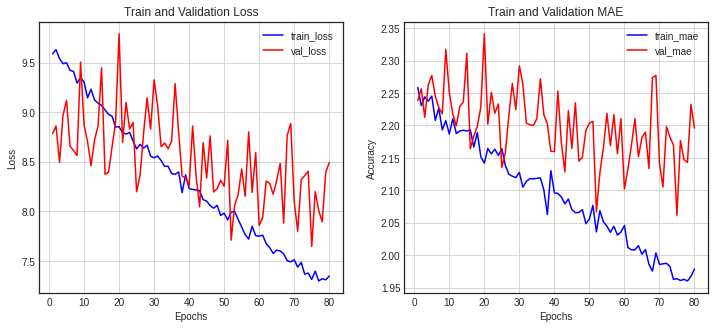

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
* 테스트 데이터를 가져와 모델 성능을 평가

In [7]:
# 모델 평가 및 예측
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(test_mae_score)

pred = model.predict(test_data)
print(pred.shape)
print(pred[0])

4/4 [==============================] - 0s 2ms/step - loss: 19.5621 - mae: 3.0029
3.0029377937316895
(102, 1)
[5.750078]


### 회고
* 데이터셋의 크기가 너무 작아 검증 데이터를 나누는 것이 도움이 되지 않는 듯 하다.
* 적은 데이터를 가지고도 검증이 가능한 방식을 활용할 필요가 있을 듯 하다.
* 찾아본 바로는 K-fold 교차 검증을 활용하는 방법이 있는 것 같다.
###### (https://gold-jae.tistory.com/37)